In [69]:
import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import cm


## 1

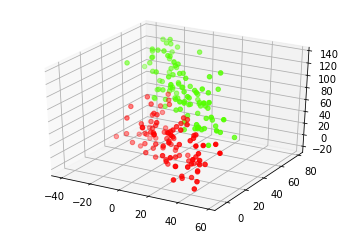

In [70]:
df = pd.read_csv('1_1.csv', header=None)
df.columns= ['x', 'y', 'z', 'Type']
figure = plt.figure()
axes = figure.add_subplot(111, projection='3d')
axes.scatter(df['x'], df['y'], df['z'], c=(1-df['Type']), cmap='prism')

In [76]:
print(df)

          x       y        z  Type
0    50.181  17.335  81.3670     0
1    35.592  32.485  50.3230     0
2    33.473  21.090  53.9320     0
3    38.641   9.590  71.1750     0
4    36.703  12.000  65.6270     0
..      ...     ...      ...   ...
195 -27.502  47.775  -7.3685     1
196 -13.291  58.205  48.3680     1
197 -15.657  53.095  41.9584     1
198 -15.837  61.495  54.3429     1
199 -37.872  38.930  -7.9808     1

[200 rows x 4 columns]


[0.73540576 0.24125825 0.02330935]


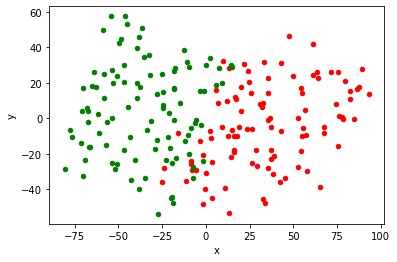

In [80]:
pca0 = PCA(n_components = 3)
plot = pd.DataFrame(pca0.fit_transform(df))
print(pca0.explained_variance_ratio_)
plot.columns =['x', 'y','z']
plot1 = plot[0:100]
plot2 = plot[100:200]
fig = plt.figure()
ax = fig.add_subplot(111)
plot1.plot(kind='scatter',ax = ax, x ='x', y='y', color = 'r')
plot2.plot(kind='scatter',ax = ax, x ='x', y='y', color = 'g')

## 2

[0.72023502 0.20482867 0.04086458 0.02221151 0.00938375 0.00088222
 0.00083329 0.00076095]


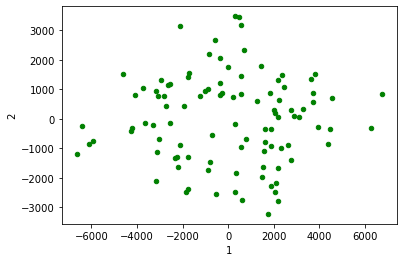

In [72]:
df1 = pd.read_csv('1_2.csv', header=None)
df1.columns= [str(i) for i in range(1,9)]
pca1=PCA(n_components=8)
plot0 = pd.DataFrame(pca1.fit_transform(df1))
print(pca1.explained_variance_ratio_)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plot0.columns =[str(i) for i in range(1,9)]
plot0[['1', '2']].plot(kind='scatter',ax = ax1, x ='1', y='2', color = 'g')

## 3

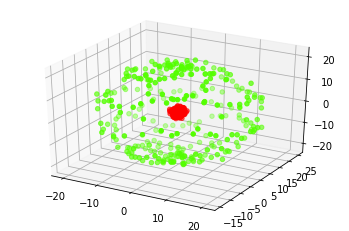

In [6]:
df2 = pd.read_csv('1_3.csv', header=None)
df2.columns= ['x', 'y', 'z', 'Type']
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
kons0_1 = df2[df2['Type'] == 0]
kons1_1 = df2[df2['Type'] == 1]
x2=df2['x']
y2=df2['y']
z2=df2['z']
c2=df2['Type']
ax1.scatter(x2, y2, z2, c=c2, cmap='prism')

[0.49711643 0.25317885]


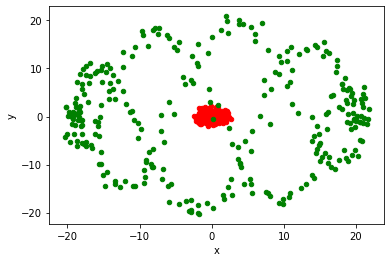

In [7]:
plot0 = pd.DataFrame(pca.fit_transform(kons0_1[['x', 'y','z']]))
plot1 = pd.DataFrame(pca.fit_transform(kons1_1[['x', 'y','z']]))
print(pca.explained_variance_ratio_)
plot0.columns = ['x', 'y']
plot1.columns = ['x', 'y']
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
plot0[['x', 'y']].plot(kind='scatter',ax = ax1, x ='x', y='y', color = 'r')
plot1[['x', 'y']].plot(kind='scatter',ax =ax1, x ='x', y='y', color = 'g')

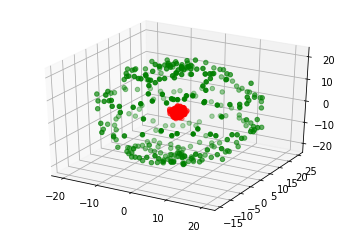

In [25]:
df3 = pd.read_csv('1_3.csv', header=None)
df3.columns= ['x', 'y', 'z', 'Type']
figure = plt.figure()
ax =figure.add_subplot(111, projection='3d')
x0 = df3[df3['Type'] == 0]['x']
x1 = df3[df3['Type'] == 1]['x']
y0 = df3[df3['Type'] == 0]['y']
y1 = df3[df3['Type'] == 1]['y']
z0 = df3[df3['Type'] == 0]['z']
z1 = df3[df3['Type'] == 1]['z']
ax.scatter(x0, y0, z0, zdir='z', c='r')
ax.scatter(x1, y1, z1, zdir='z', c='g')

In [62]:
def trans(x):
    return np.array(x) - x.mean()

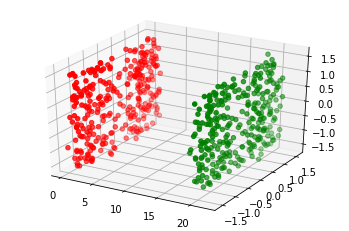

In [63]:
a0 = trans(x0)
b0 = trans(y0)
c0 = trans(z0)
a1 = trans(x1)
b1 = trans(y1)
c1 = trans(z1)

r0 = np.sqrt(c0**2 + b0**2+a0**2)
tetta0 = np.arctan((np.sqrt(a0**2+b0**2))/c0)
phi0 = np.arctan(b0/a0)
r1 = np.sqrt(c1**2 + b1**2+a1**2)
tetta1 = np.arctan((np.sqrt(a1**2+b1**2))/c1)
phi1 = np.arctan(b1/a1)
figure = plt.figure()
ax = figure.add_subplot(111, projection="3d")
ax.scatter(r0, tetta0, phi0, zdir='z', c='r')
ax.scatter(r1, tetta1, phi1, zdir='z', c='g')

[0.9805448  0.01022046 0.00923474]


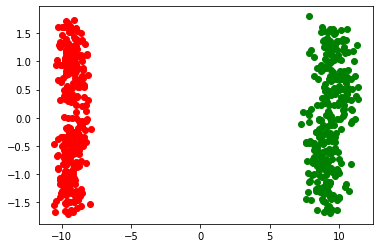

In [66]:
r = np.append(r0, r1)
tetta = np.append(tetta0, tetta1)
phi = np.append(phi0, phi1)
plot = np.transpose((r, tetta, phi))
pca2=PCA(n_components=3)
plot1 = pd.DataFrame(pca2.fit_transform(plot))
print(pca2.explained_variance_ratio_)
plot1.columns = ['x', 'y','z']
xs = plot1['x'][0:300]
ys = plot1['y'][0:300]
xs1 = plot1['x'][300: 600]
ys1 = plot1['y'][300: 600]
plt.scatter(xs, ys, c='r')
plt.scatter(xs1, ys1, c='g')